# Diabetes Dataset sklearn

1. **age** - возраст в годах
2. **sex** - пол
3. **bmi** (body mass index) - индекс массы тела
4. **bp** - среднее артериальное давление
5. **s1** (tc - T-Cells (a type of white blood cells)) - тип лейкоцитов
6. **s2** (ldl, low-density lipoproteins) - липопротеины низкой плотности
7. **s3** (hdl, high-density lipoproteins) - липопротеины высокой плотности
8. **s4** (tch, thyroid stimulating hormone) - тиреотропный гормон
9. **s5** (ltg, lamotrigine) - ламотриджин
10. **s6** (glu, blood sugar level) - уровень сахара в крови
11. **y** (response) - ответ

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
file_path = './diabetes.tab.txt'
diabetes = pd.read_csv(file_path, delimiter='\t')  

diabetes.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


# Метод Надарая-Ватсона

**Регрессия Надарая-Уотсона** — это разновидность регрессии ядра, которая представляет собой непараметрический метод оценки кривой наилучшего соответствия для набора данных. В отличие от линейной регрессии или полиномиальной регрессии, регрессия ядра не предполагает какого-либо базового распределения данных. Для оценки используется функция ядра, которая представляет собой функцию взвешивания, которая присваивает вес каждой точке данных в зависимости от того, насколько близко она находится к текущей точке. Вычисленные весовые коэффициенты затем используются для вычисления средневзвешенного значения точек данных. Формально, предсказание для некоторой точки (x) вычисляется следующим образом: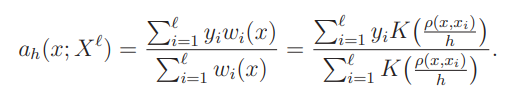


где

* $\alpha(x)$ - предсказанное значение для точки $x$,
* $y_i$ - значение зависимой переменной для наблюдения $i$,
* $w_i$ - вес, который зависит от расстояния между точкой $x$ и наблюдением $i$.

Эта формула интуитивно очевидна: значение $\alpha(x)$ есть среднее $y_i$ по объектам $x_i$, ближайшим к $x$.

## Исследовательский анализ данных

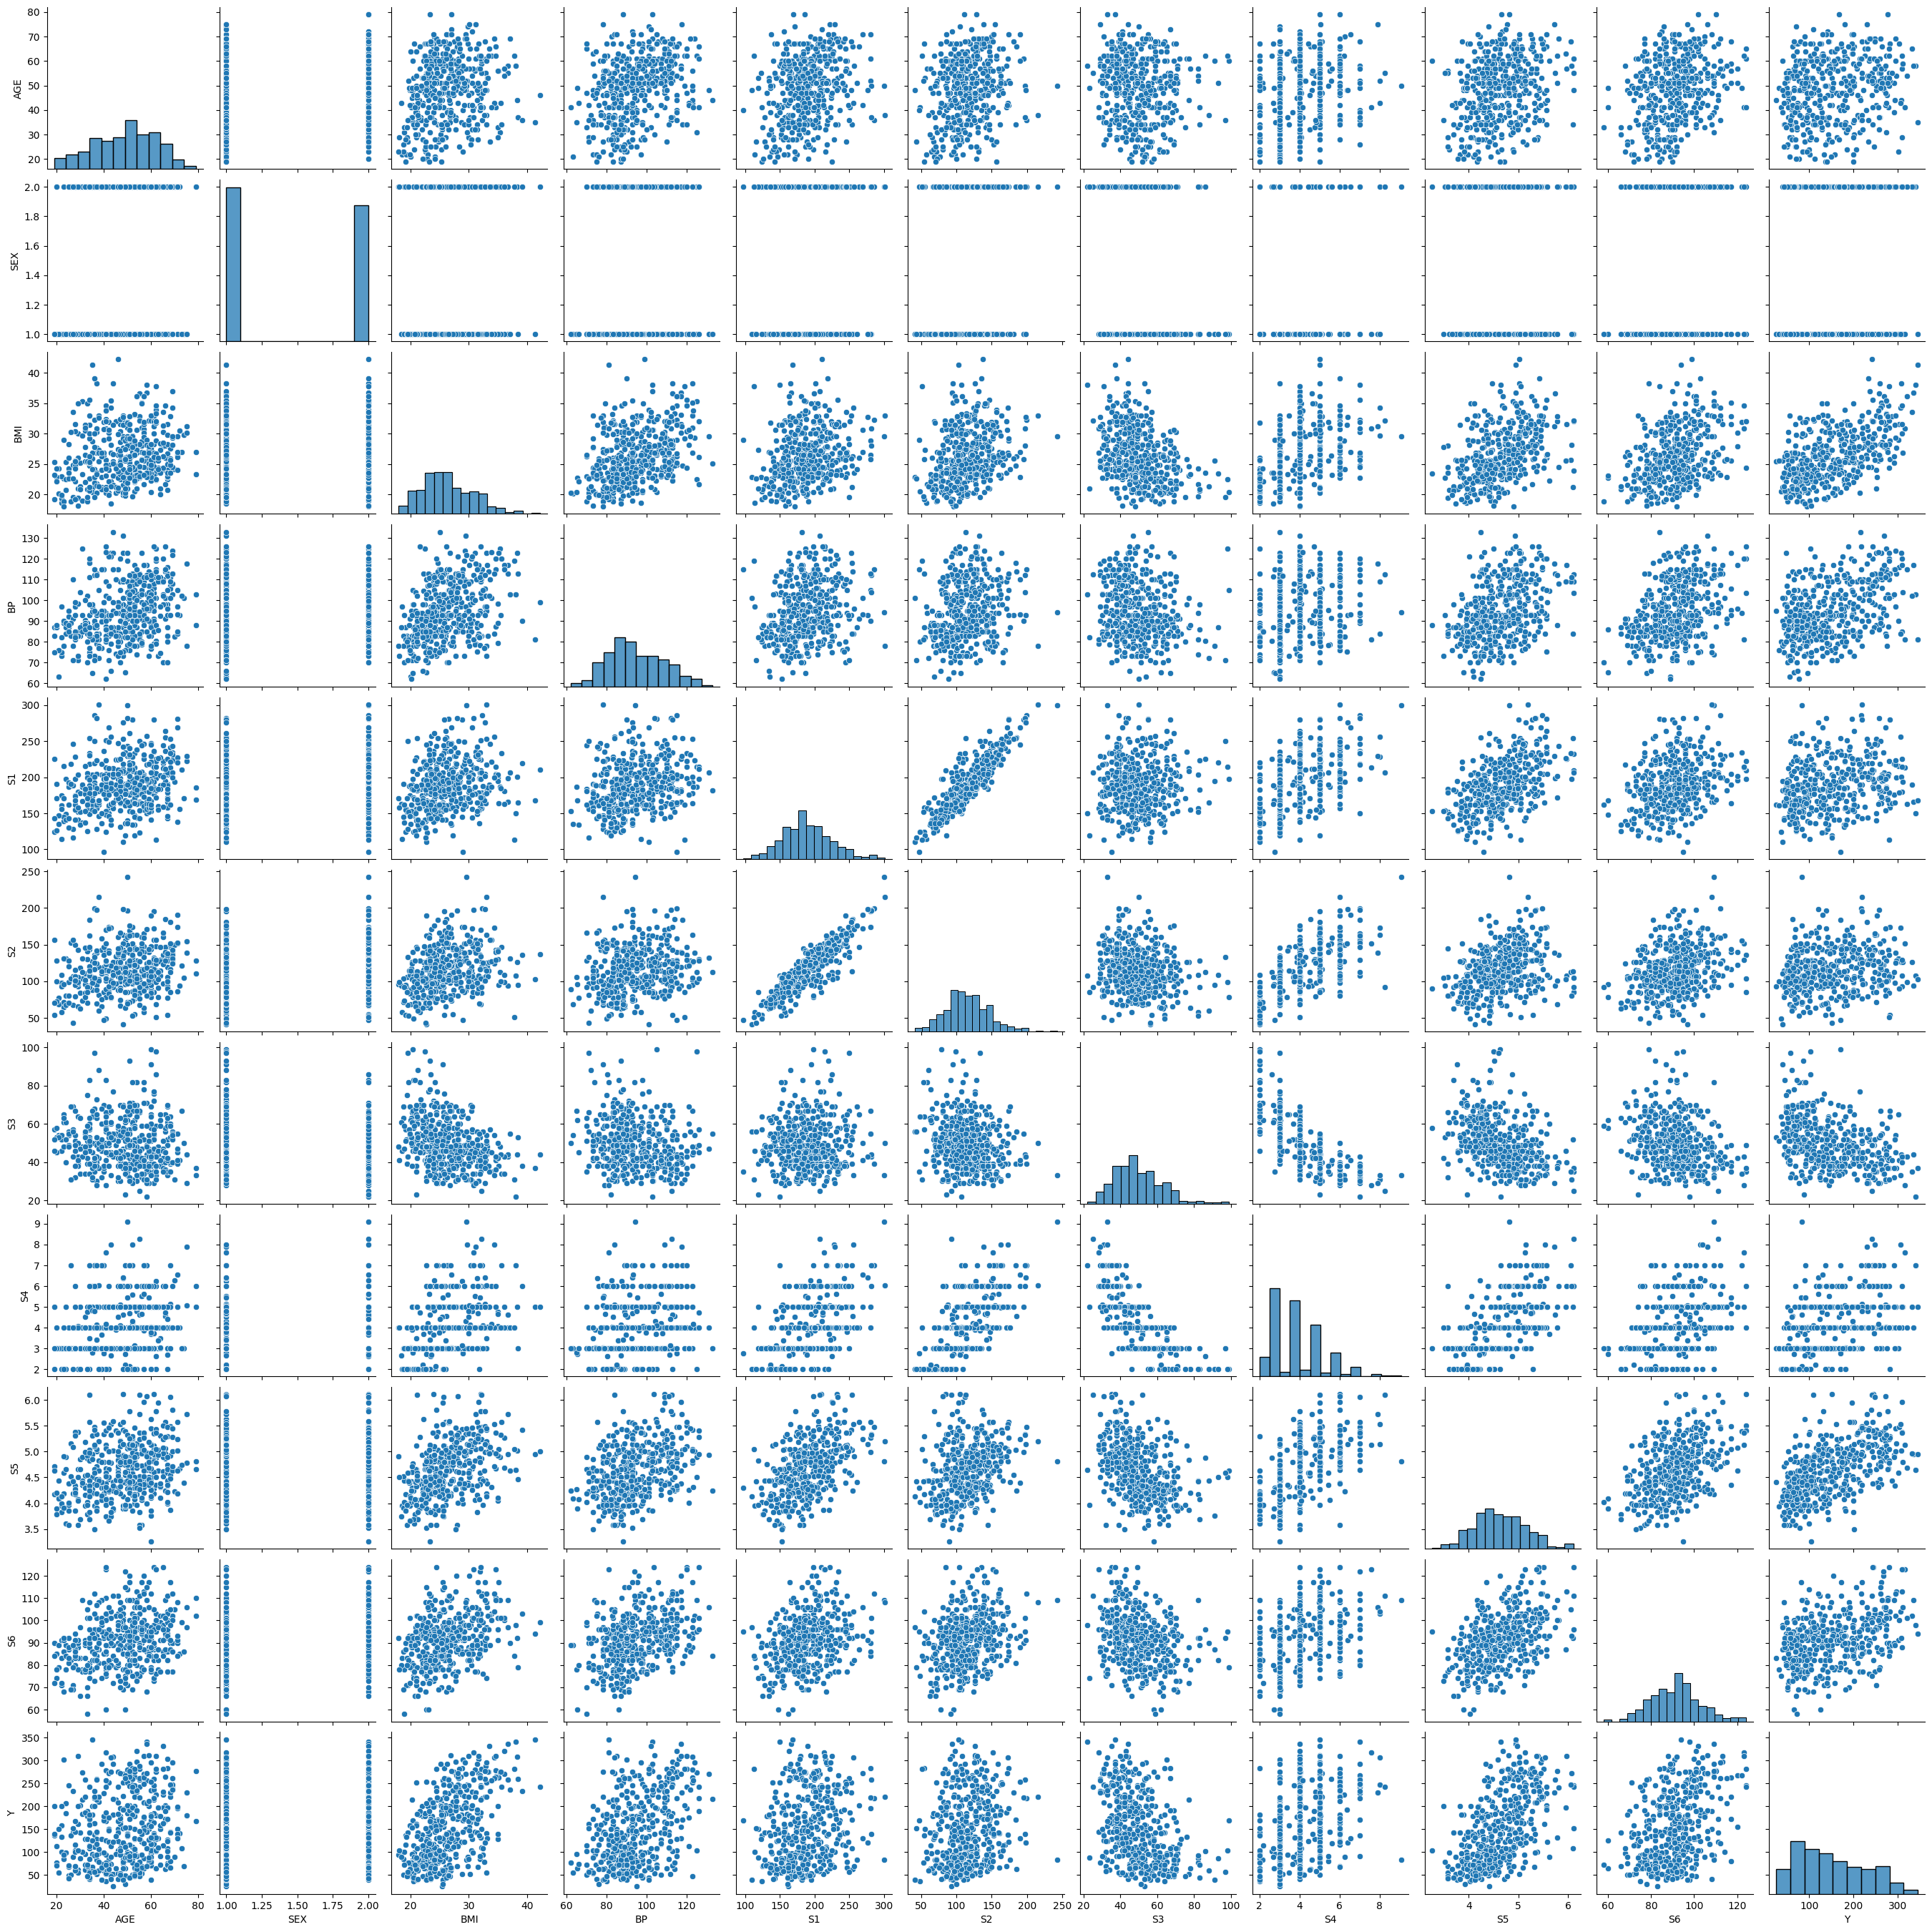

In [27]:
sns.pairplot(data);

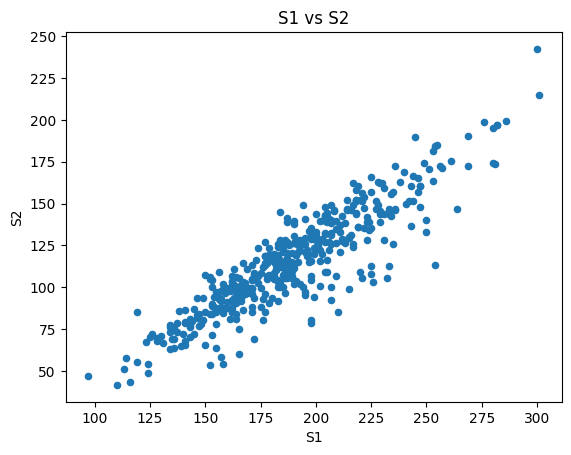

In [34]:
diabetes.plot(x='S1', y='S2', kind='scatter')
plt.xlabel('S1')
plt.ylabel('S2')
plt.title('S1 vs S2')
plt.show()

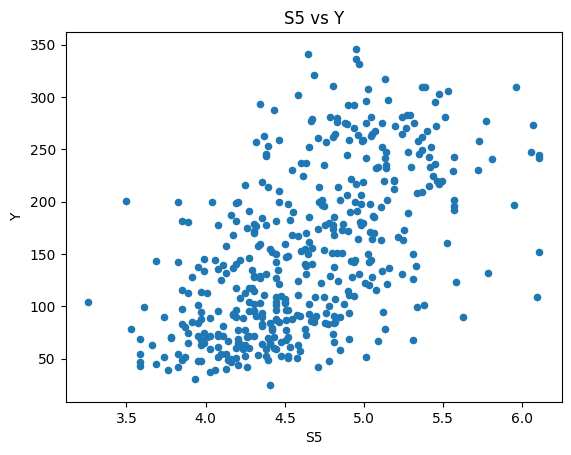

In [30]:
diabetes.plot(x='S5', y='Y', kind='scatter')
plt.xlabel('S5')
plt.ylabel('Y')
plt.title('S5 vs Y')
plt.show()

<AxesSubplot: title={'center': 'Correlation between dataset variables'}>

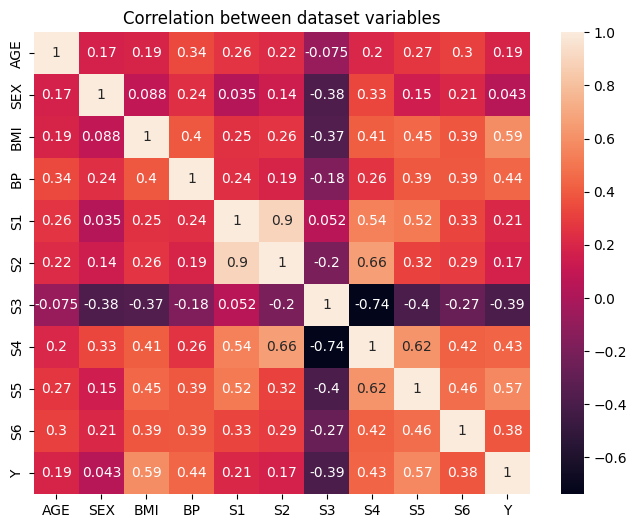

In [34]:
plt.figure(figsize=(8,6))
plt.title('Correlation between dataset variables')
sns.heatmap(diabetes.corr(), annot=True)

Мы видим корреляцию между данными. Корреляция близка к 1 указывает на положительную линейную связь, а к -1 на отрицательную. Значения близкие к 0 говорят об отсутствии линейной связи.

Например, S1 и S2 увеличиваются и имеют положительную корреляцию между собой, что может сделать ненужным сохранение любого из них. S3 и S4 также тесно связаны, поскольку имеют значение корреляции, близкое к -1. По мере увеличения одного - другое уменьшается.

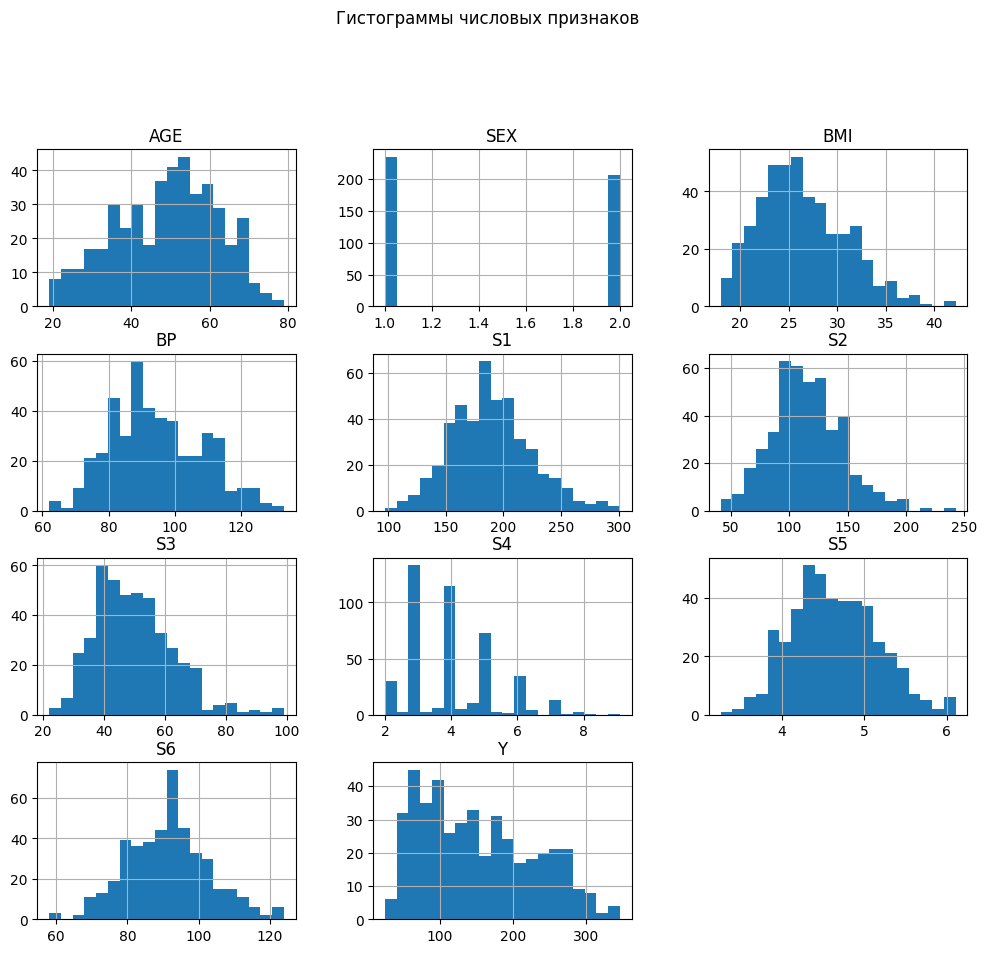

In [4]:
diabetes.hist(figsize=(12, 10), bins=20)
plt.suptitle('Гистограммы числовых признаков', y=1.02)
plt.show()

C:\Users\Dns\AppData\Local\Temp\ipykernel_15792\3180070514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI', data=diabetes, palette='viridis')


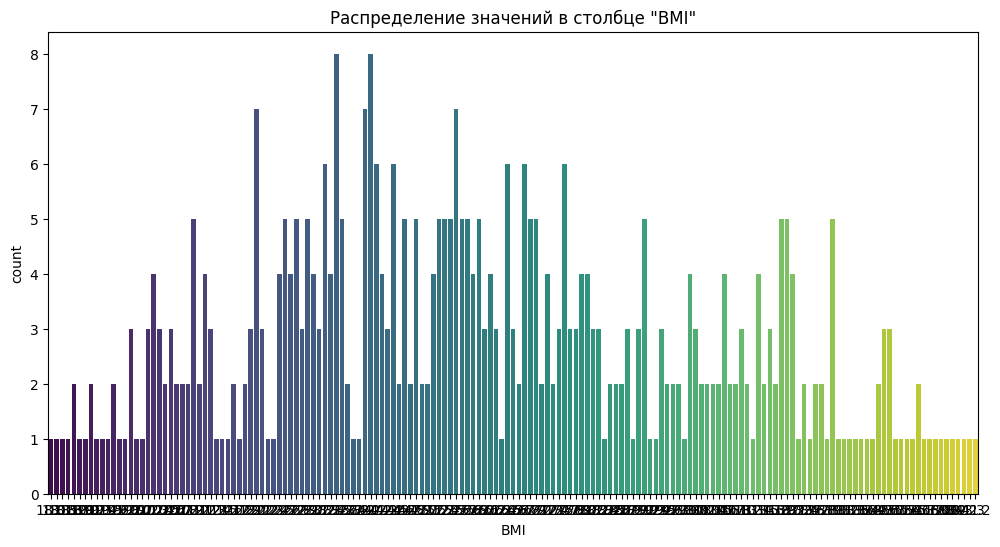

In [5]:
# Построим countplot для категориальных признаков
plt.figure(figsize=(12, 6))
sns.countplot(x='BMI', data=diabetes, palette='viridis')
plt.title('Распределение значений в столбце "BMI"')
plt.show()

C:\Users\Dns\AppData\Local\Temp\ipykernel_15792\3596736764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='S5', data=diabetes, palette='viridis')


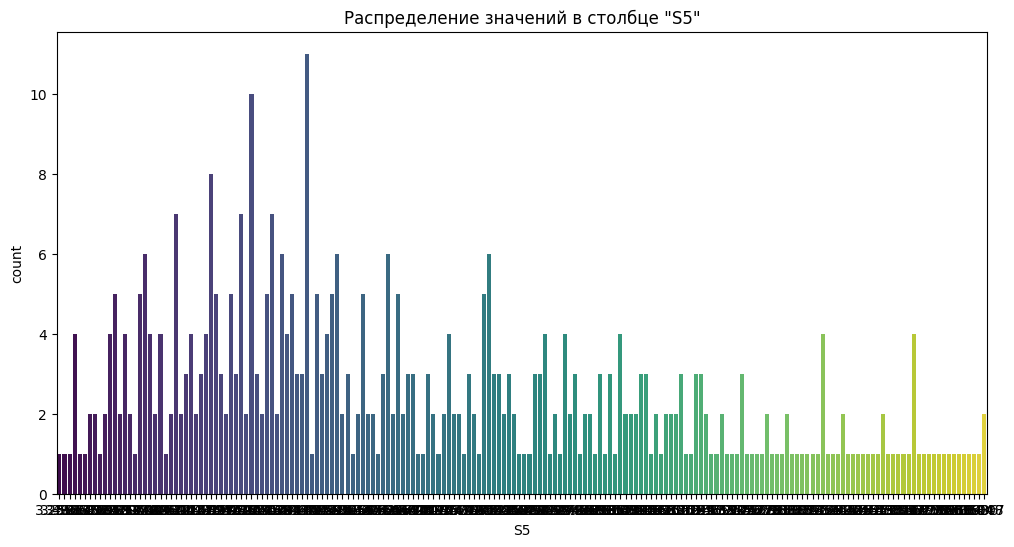

In [7]:
# Построим countplot для категориальных признаков
plt.figure(figsize=(12, 6))
sns.countplot(x='S5', data=diabetes, palette='viridis')
plt.title('Распределение значений в столбце "S5"')
plt.show()

## Подготовка данных

1. ***Деление данных***: Сначала мы разделяем данные на признаки (X) и целевую переменную (y). Признак Y является нашей целевой переменной, и мы исключаем его из признаков.
2. ***Разделение на обучающий и тестовый наборы данных***: Мы разделяем данные на обучающий и тестовый наборы с использованием train_test_split(). Обучающий набор используется для обучения модели, а тестовый - для оценки её производительности.
3. ***Нормализация числовых признаков***: Числовые признаки S1 и S2 нормализуются с использованием StandardScaler(). Нормализация важна для метода k-ближайших соседей, так как этот метод чувствителен к масштабу признаков.
4. ***Создание и обучение модели Надарая-Ватсона*** (KNN): Мы создаем модель метода k-ближайших соседей (KNeighborsRegressor()), а затем обучаем её на обучающем наборе данных.
5. ***Предсказание и оценка производительности***: Мы используем обученную модель для предсказания целевых значений на тестовом наборе данных и затем оцениваем её производительность с использованием среднеквадратичной ошибки (mean_squared_error). 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки (X) и целевую переменную (y)
X = diabetes.drop('Y', axis=1)
y = diabetes['Y']

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация числовых признаков
scaler = StandardScaler()
X_train[['S1', 'S2']] = scaler.fit_transform(X_train[['S1', 'S2']])
X_test[['S1', 'S2']] = scaler.transform(X_test[['S1', 'S2']])

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Создание модели Надарая-Ватсона
knn = KNeighborsRegressor()

# Обучение модели
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [28]:
# Предсказание на тестовых данных
y_pred = knn.predict(X_test)

# Оценка производительности модели
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4207.646741573034


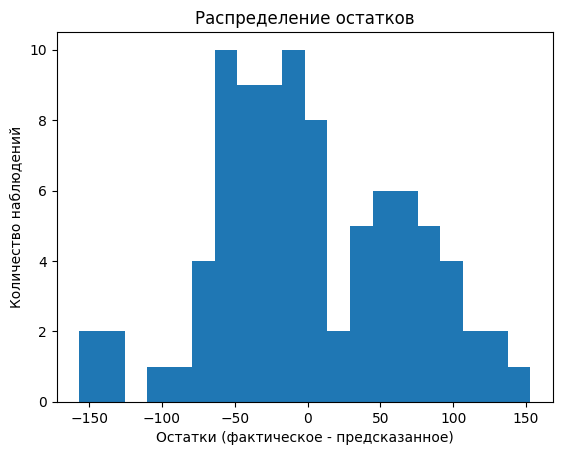

In [29]:
# Распределение остатков
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Остатки (фактическое - предсказанное)")
plt.ylabel("Количество наблюдений")
plt.title("Распределение остатков")
plt.show()

## Оптимизация

In [30]:
from sklearn.model_selection import GridSearchCV

# Создание модели Надарая-Ватсона
knn = KNeighborsRegressor()

# Задаем параметры для оптимизации
param_grid = {'n_neighbors': range(1, 21)}  # Попробуем от 1 до 20 соседей

# Используем GridSearchCV для оптимизации
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Вывод наилучших параметров
print(f"Наилучшие параметры: {grid_search.best_params_}")

# Обучение модели с наилучшими параметрами
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_optimized = best_knn.predict(X_test)

# Оценка производительности оптимизированной модели
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
print(f'Mean Squared Error (оптимизированная модель): {mse_optimized}')

Наилучшие параметры: {'n_neighbors': 11}
Mean Squared Error (оптимизированная модель): 3830.533661435602


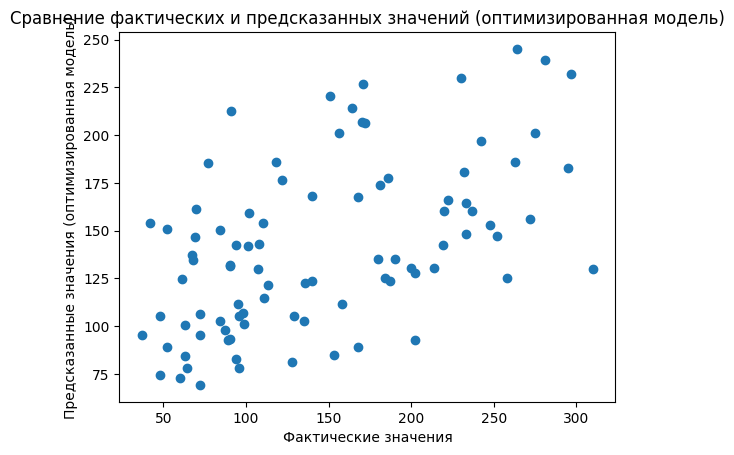

In [31]:
plt.scatter(y_test, y_pred_optimized)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения (оптимизированная модель)")
plt.title("Сравнение фактических и предсказанных значений (оптимизированная модель)")
plt.show()

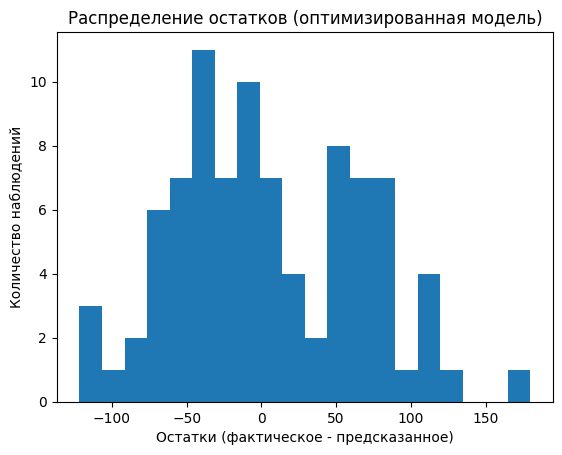

In [32]:
residuals_optimized = y_test - y_pred_optimized
plt.hist(residuals_optimized, bins=20)
plt.xlabel("Остатки (фактическое - предсказанное)")
plt.ylabel("Количество наблюдений")
plt.title("Распределение остатков (оптимизированная модель)")
plt.show()

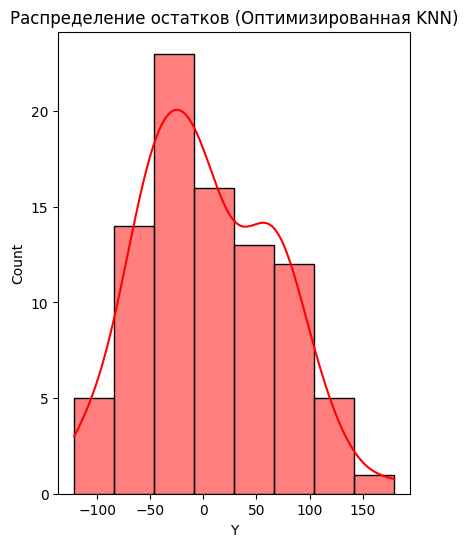

In [33]:
# Расчет остатков для линейной регрессии и оптимизированной KNN
residuals_knn = y_test - y_pred_optimized

# График распределения остатков
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 2)
sns.histplot(residuals_knn, kde=True, color='red')
plt.title('Распределение остатков (Оптимизированная KNN)')

plt.show()

***Кривая непараметрической оценки регрессии Нардая-Ватсона***